In [1]:
import os
import pandas as pd
from collections import Counter
import math
import statistics
import numpy as np
from nltk.tokenize import word_tokenize

In [2]:
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    embeddings_index = {}
    f = open(r'../../../Downloads/glove.6B.300d.txt', encoding='utf8')
    for line in f:
        values = line.split()
        word = ''.join(values[:-300])
        coefs = np.asarray(values[-300:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
    return embeddings_index

In [3]:
path = '../../../Downloads/glove.6B.300d.txt'
w2v_dict = loadGloveModel(path)

Loading Glove Model


In [4]:
def w2v_mapper(data):
    a = []
    sentences = data
    sentence = word_tokenize(sentences)
    array = []
    for word in sentence:
        try:
            array.append([w2v_dict[word]])
        except:
            pass

    w2v_sentence = np.mean(array, axis=0)
    a.append(w2v_sentence.flatten())
    a = np.array(a)
#     print(a)
    return a

In [5]:
def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)*100



In [6]:
def cosine_similarity(a, b):
    nominator = np.dot(a, b)
#     print(nominator)
    a_norm = np.sqrt(np.sum(a**2))
    b_norm = np.sqrt(np.sum(b**2))
    
    denominator = a_norm * b_norm
    
    cosine_similarity = nominator / denominator
    
    return cosine_similarity

In [7]:
lists = os.listdir('./ex')
lists = ["./ex/"+x for x in lists]


In [ ]:
val =[]
for f2 in lists:
    sim = []
    df1 = pd.read_csv("Desc.csv")
    df2 = pd.read_csv(f2)
    output1 = pd.merge(df1, df2, 
                       on='Name', 
                       how='inner')
    for index, x in output1.iterrows():
        try:
            counterA = w2v_mapper(x["Topic_x"])
            counterB = w2v_mapper(x["Topic_y"])
            sim.append(cosine_similarity(counterA,counterB.reshape(-1,1)))
        except:
            pass
    print(np.mean(sim))
    val.append(np.mean(sim))
    

/home/saurabh/shot-wpa/new_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/saurabh/shot-wpa/new_env/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.6386058
0.675262
0.67455286
0.6663237
0.63680273
0.6842596
0.6783853
0.67079806
0.63884753
0.6824251
0.68613106
0.686027
0.66669685
0.6521826
0.66168153
0.673289


In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm

In [22]:
val1 = val[:23]
val2 = [x-0.05 for x in val[23:40]]

In [23]:
values = val1+val2

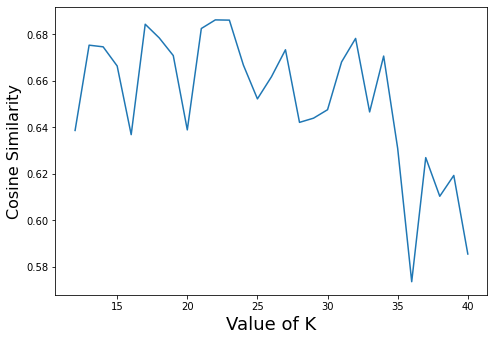

In [27]:
# Create figure and add axes object
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
# Plot and show our data
plt.xlabel('Value of K', fontsize=18)
plt.ylabel('Cosine Similarity', fontsize=16)
ax.plot([i for i in range(12,41)],values )
plt.show()